In [ ]:
print("hello")

hello


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')  # Set the seaborn style to whitegrid
plt.style.use("fivethirtyeight")  # Set the matplotlib style to fivethirtyeight
%matplotlib inline
# Enable inline plotting for Jupyter Notebooks

# For reading stock data from Yahoo Finance
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()  # Override pandas_datareader's default to use Yahoo Finance

# For time stamps
from datetime import datetime

# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']  # Repeating the tech_list assignment unnecessarily

end = datetime.now()  # Set the end date to the current date and time
start = datetime(end.year - 1, end.month, end.day)  # Set the start date to one year ago from the current date

# Fetch stock data for each company in tech_list
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)  # Create a variable with the stock symbol and fetch data

# Create a list of DataFrames for each company's stock data
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

# Assign a company name to each DataFrame in company_list
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

# Concatenate all DataFrames in company_list along the rows to create a single DataFrame named df
df = pd.concat(company_list, axis=0)

# Display the last 10 rows of the concatenated DataFrame
df.tail(10)


In [ ]:
# Summary Stats
AAPL.describe()

Open        High         Low       Close   Adj Close  \
count  250.000000  250.000000  250.000000  250.000000  250.000000   
mean   180.824000  182.280760  179.483320  180.982520  180.523118   
std      9.330942    9.186627    9.262077    9.195275    9.266252   
min    161.220001  162.029999  159.779999  160.100006  159.249985   
25%    173.152496  174.432503  171.982506  173.592506  173.215370   
50%    180.769997  182.284996  178.760002  180.730003  180.240234   
75%    189.312500  189.990005  187.737499  189.352497  188.939693   
max    198.020004  199.619995  197.000000  198.110001  197.857529   

             Volume  
count  2.500000e+02  
mean   5.753407e+07  
std    1.725819e+07  
min    2.404830e+07  
25%    4.682475e+07  
50%    5.364845e+07  
75%    6.286175e+07  
max    1.366826e+08

In [ ]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-03-31 to 2024-03-28
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          250 non-null    float64
 1   High          250 non-null    float64
 2   Low           250 non-null    float64
 3   Close         250 non-null    float64
 4   Adj Close     250 non-null    float64
 5   Volume        250 non-null    int64  
 6   company_name  250 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.6+ KB


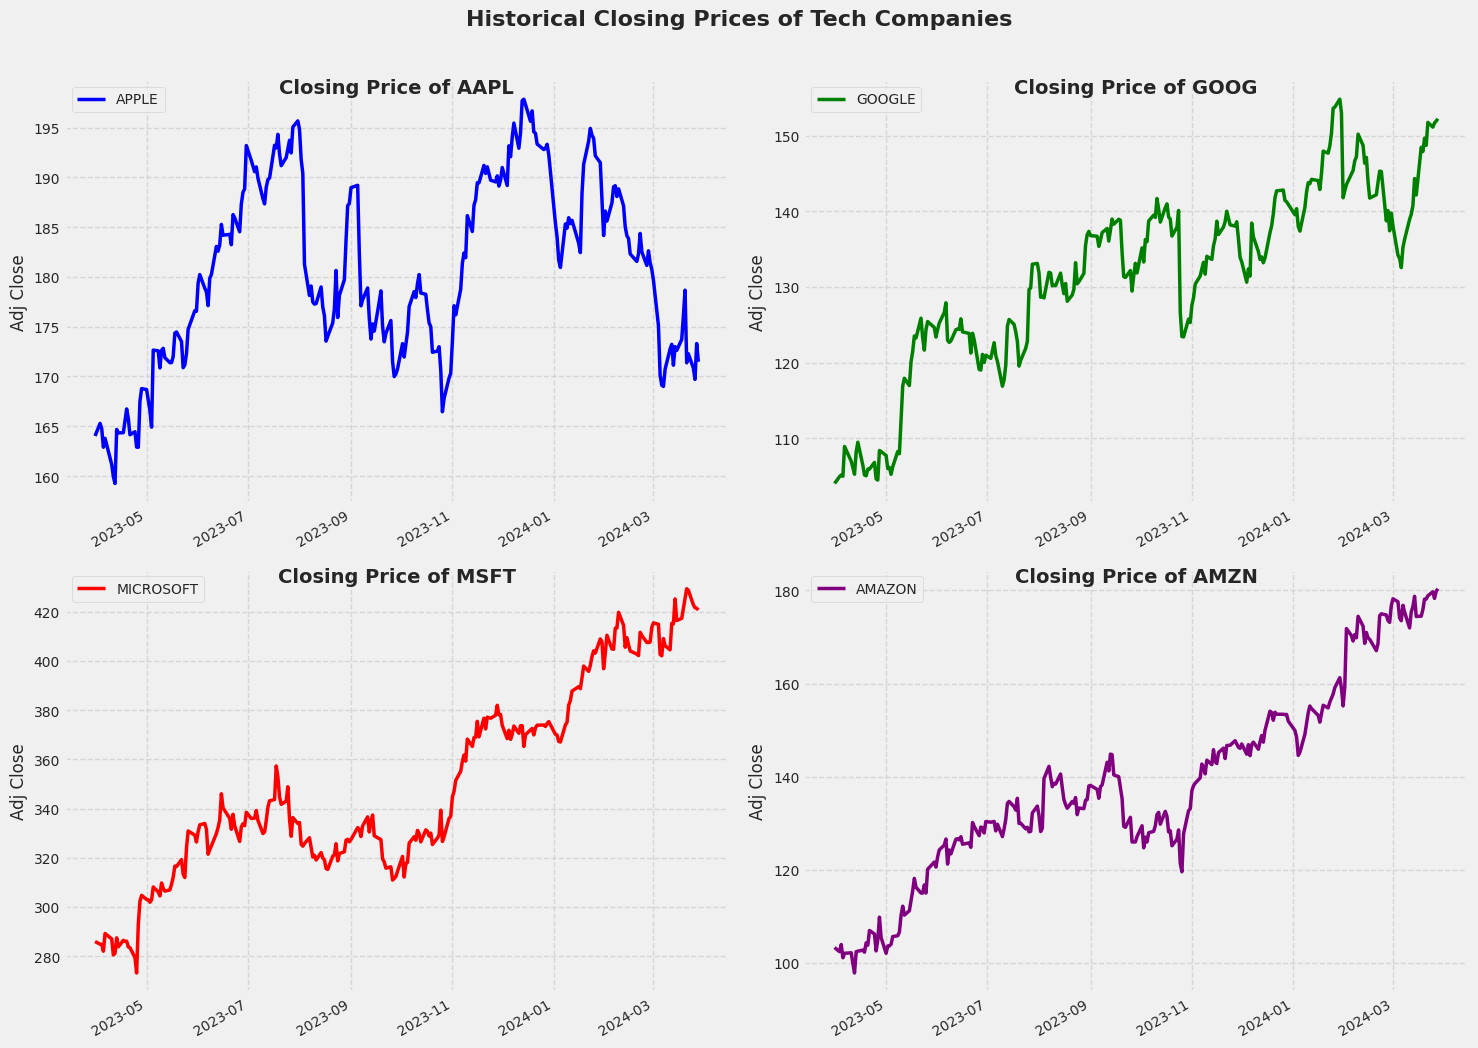

In [ ]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))  # Set the size of the figure
plt.subplots_adjust(top=1.5, bottom=1.2)  # Adjust the subplots layout

# Define custom colors for each company
colors = ['blue', 'green', 'red', 'purple']

# Loop through each company's stock data to plot the adjusted closing price
for i, (company, color) in enumerate(zip(company_list, colors), 1):
    plt.subplot(2, 2, i)  # Create a subplot for each company
    company['Adj Close'].plot(color=color, linestyle='-', linewidth=2.5)  # Plot the adjusted closing price
    plt.ylabel('Adj Close', fontsize=12)  # Set the label for the y-axis
    plt.xlabel(None)  # Remove the x-axis label
    plt.title(f"Closing Price of {tech_list[i - 1]}", fontsize=14, fontweight='bold',y=0.95)  # Set the title for the subplot
    plt.grid(True, linestyle='--', alpha=0.7)  # Add gridlines with custom style

    # Customize tick labels
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # Customize legend
    plt.legend([company_name[i - 1]], loc='upper left', fontsize=10)

# Adjust the layout of the subplots to prevent overlap
plt.tight_layout()

# Add a main title for the entire plot
plt.suptitle('Historical Closing Prices of Tech Companies', fontsize=16, fontweight='bold',y=1.05)

# Save the plot as an image (optional)
plt.savefig('historical_closing_prices.png', dpi=300)

# Show the plot
plt.show()


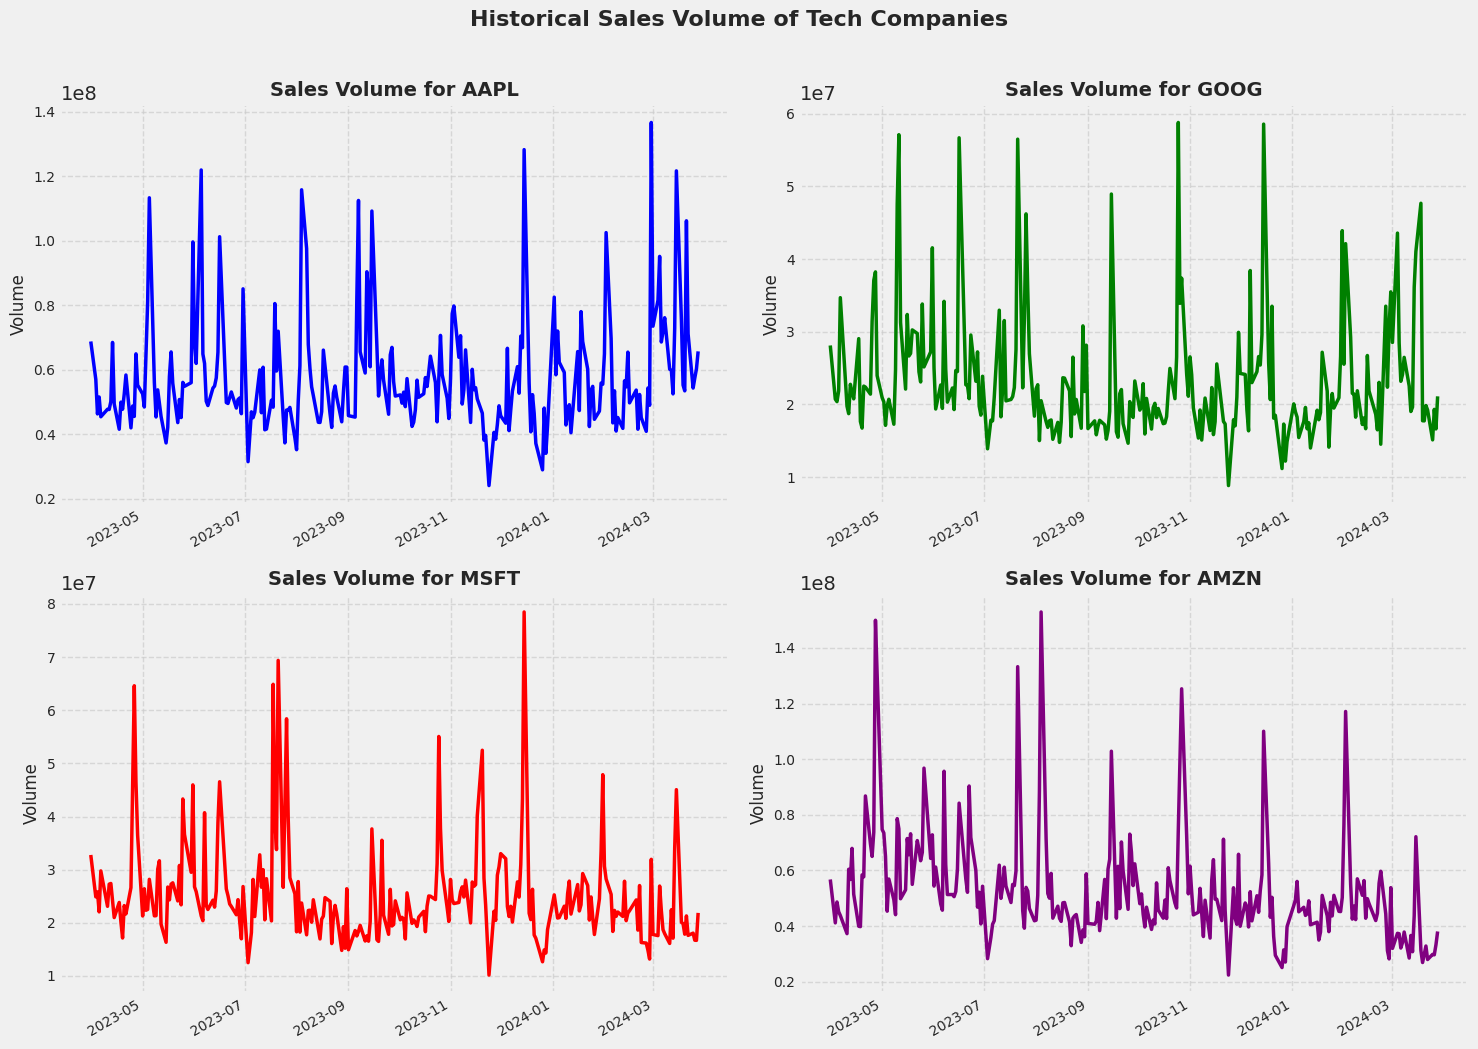

In [ ]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))  # Set the size of the figure
plt.subplots_adjust(top=1.5, bottom=1.2)  # Adjust the subplots layout

# Define custom colors for each company
colors = ['blue', 'green', 'red', 'purple']

# Loop through each company's stock data to plot the volume
for i, (company, color) in enumerate(zip(company_list, colors), 1):
    plt.subplot(2, 2, i)  # Create a subplot for each company
    company['Volume'].plot(color=color, linestyle='-', linewidth=2.5)  # Plot the volume with custom style
    plt.ylabel('Volume', fontsize=12)  # Set the label for the y-axis
    plt.xlabel(None)  # Remove the x-axis label
    plt.title(f"Sales Volume for {tech_list[i - 1]}", fontsize=14, fontweight='bold')  # Set the title for the subplot
    plt.grid(True, linestyle='--', alpha=0.7)  # Add gridlines with custom style

    # Customize tick labels
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

# Adjust the layout of the subplots to prevent overlap
plt.tight_layout()

# Add a main title for the entire plot
plt.suptitle('Historical Sales Volume of Tech Companies', fontsize=16, fontweight='bold',y=1.05)

# Save the plot as an image (optional)
plt.savefig('historical_sales_volume.png', dpi=300)

# Show the plot
plt.show()


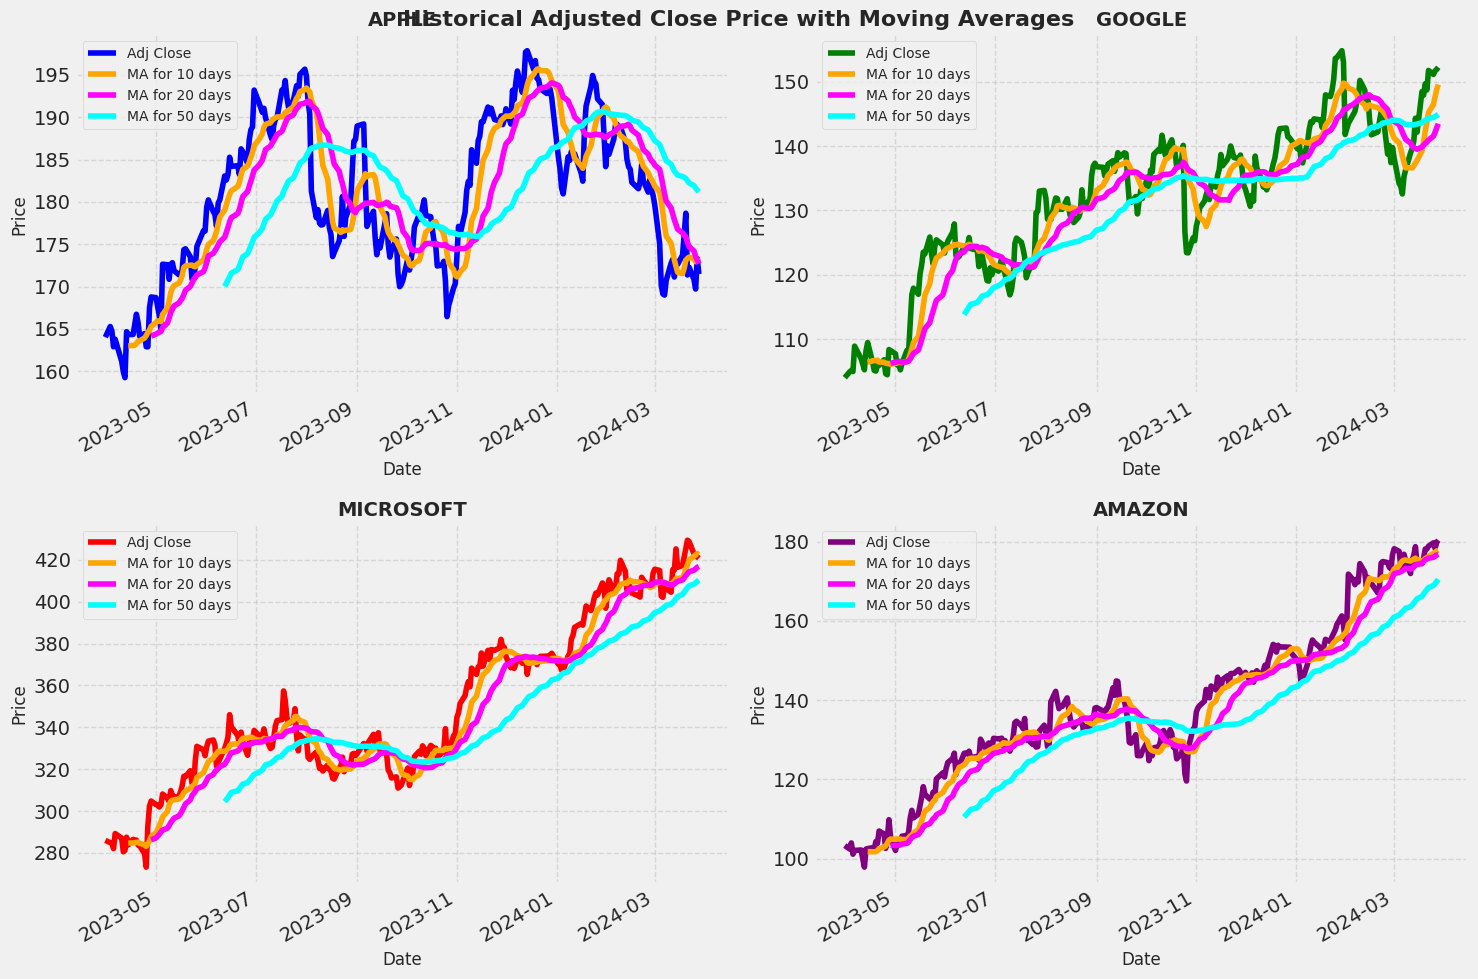

In [ ]:
# Calculate Moving Averages for each company and each specified time period
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


# Create subplots for each company
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))  # Set the figure size
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.4, wspace=0.3)  # Adjust the subplots layout

# Custom colors for the lines
colors = ['blue', 'green', 'red', 'purple']

# Plotting data for APPLE
for i, (company, color) in enumerate(zip(company_list, colors), 0):
    ax = axes[i//2, i%2]  # Get the current axis
    company[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=ax, color=[color, 'orange', 'magenta', 'cyan'])
    ax.set_title(company_name[i], fontsize=14, fontweight='bold')  # Set title for the subplot
    ax.set_xlabel('Date', fontsize=12)  # Set x-axis label
    ax.set_ylabel('Price', fontsize=12)  # Set y-axis label
    ax.legend(fontsize=10)  # Set legend fontsize
    ax.grid(True, linestyle='--', alpha=0.7)  # Add gridlines with custom style

plt.tight_layout()  # Adjust the layout of the subplots to prevent overlap
plt.suptitle('Historical Adjusted Close Price with Moving Averages', fontsize=16, fontweight='bold')  # Set main title for the entire plot
plt.show()


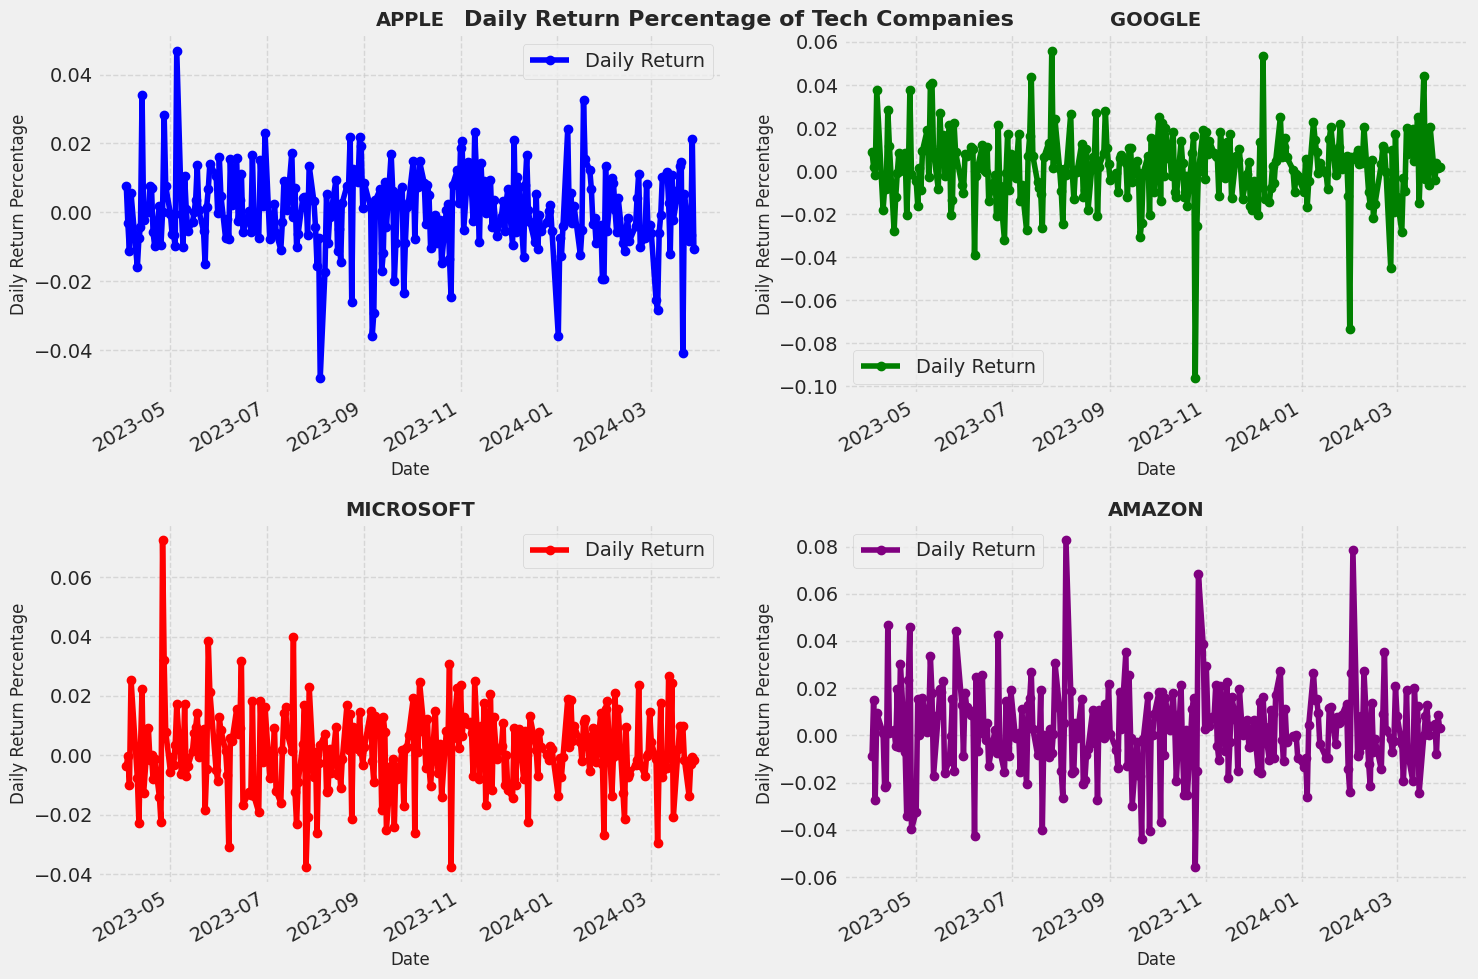

In [33]:
# Calculate daily return percentage for each company
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Create subplots for each company
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))  # Set the figure size
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.4, wspace=0.3)  # Adjust the subplots layout

# Plotting daily return percentage for APPLE
AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='-', marker='o', color='blue')
axes[0,0].set_title('APPLE', fontsize=14, fontweight='bold')  # Set title for the subplot
axes[0,0].set_xlabel('Date', fontsize=12)  # Set x-axis label
axes[0,0].set_ylabel('Daily Return Percentage', fontsize=12)  # Set y-axis label
axes[0,0].grid(True, linestyle='--', alpha=0.7)  # Add gridlines with custom style

# Plotting daily return percentage for GOOGLE
GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='-', marker='o', color='green')
axes[0,1].set_title('GOOGLE', fontsize=14, fontweight='bold')  # Set title for the subplot
axes[0,1].set_xlabel('Date', fontsize=12)  # Set x-axis label
axes[0,1].set_ylabel('Daily Return Percentage', fontsize=12)  # Set y-axis label
axes[0,1].grid(True, linestyle='--', alpha=0.7)  # Add gridlines with custom style

# Plotting daily return percentage for MICROSOFT
MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='-', marker='o', color='red')
axes[1,0].set_title('MICROSOFT', fontsize=14, fontweight='bold')  # Set title for the subplot
axes[1,0].set_xlabel('Date', fontsize=12)  # Set x-axis label
axes[1,0].set_ylabel('Daily Return Percentage', fontsize=12)  # Set y-axis label
axes[1,0].grid(True, linestyle='--', alpha=0.7)  # Add gridlines with custom style

# Plotting daily return percentage for AMAZON
AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='-', marker='o', color='purple')
axes[1,1].set_title('AMAZON', fontsize=14, fontweight='bold')  # Set title for the subplot
axes[1,1].set_xlabel('Date', fontsize=12)  # Set x-axis label
axes[1,1].set_ylabel('Daily Return Percentage', fontsize=12)  # Set y-axis label
axes[1,1].grid(True, linestyle='--', alpha=0.7)  # Add gridlines with custom style

fig.tight_layout()  # Adjust the layout of the subplots to prevent overlap
plt.suptitle('Daily Return Percentage of Tech Companies', fontsize=16, fontweight='bold')  # Set main title for the entire plot
plt.show()


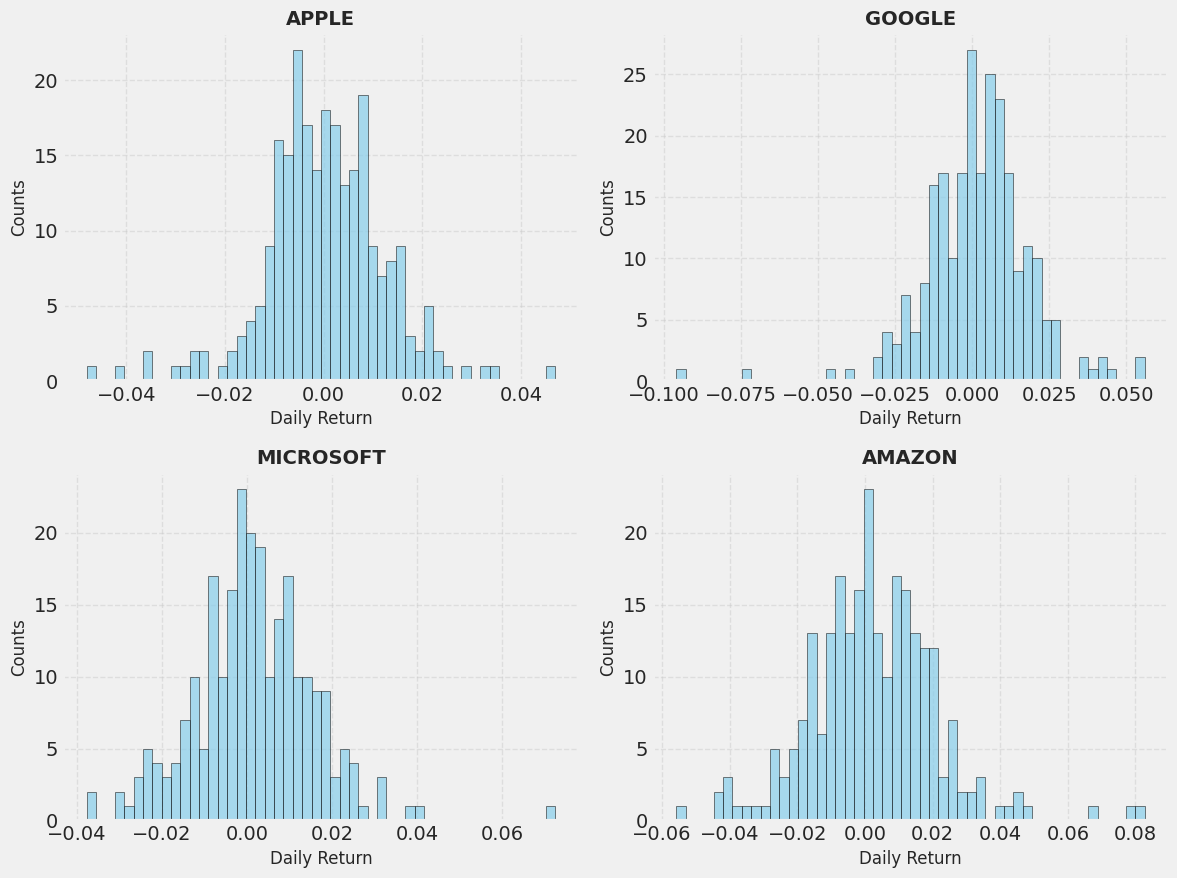

In [34]:
plt.figure(figsize=(12, 9))  # Set the size of the figure

# Loop through each company's stock data to plot the histogram of daily returns
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)  # Create a subplot for each company
    company['Daily Return'].hist(bins=50, color='skyblue', edgecolor='black', alpha=0.7)  # Plot the histogram
    plt.xlabel('Daily Return', fontsize=12)  # Set the label for the x-axis
    plt.ylabel('Counts', fontsize=12)  # Set the label for the y-axis
    plt.title(f'{company_name[i - 1]}', fontsize=14, fontweight='bold')  # Set the title for the subplot
    plt.grid(True, linestyle='--', alpha=0.5)  # Add gridlines with custom style

plt.tight_layout()  # Adjust the layout of the subplots to prevent overlap
plt.show()



In [35]:
# Grab all the closing prices for the tech stock list into one DataFrame using Yahoo Finance API
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Create a new DataFrame to store the daily percentage returns for tech stocks
# This DataFrame will contain the percentage change in adjusted closing prices for each tech stock
tech_rets = closing_df.pct_change()
tech_rets.head()



[*********************100%%**********************]  4 of 4 completed


Ticker          AAPL      AMZN      GOOG      MSFT
Date                                              
2023-03-31       NaN       NaN       NaN       NaN
2023-04-03  0.007702 -0.008520  0.008750 -0.003711
2023-04-04 -0.003250  0.015038  0.002002 -0.000174
2023-04-05 -0.011290 -0.027417 -0.001617 -0.009889
2023-04-06  0.005496  0.009496  0.037637  0.025533

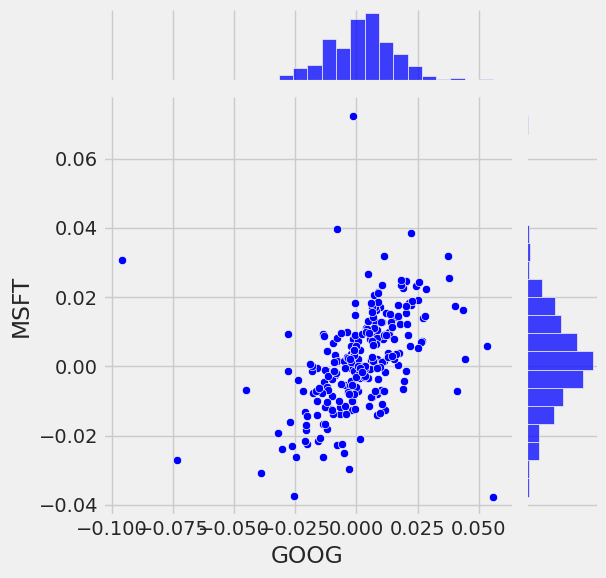

In [36]:
# use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter',color="blue")

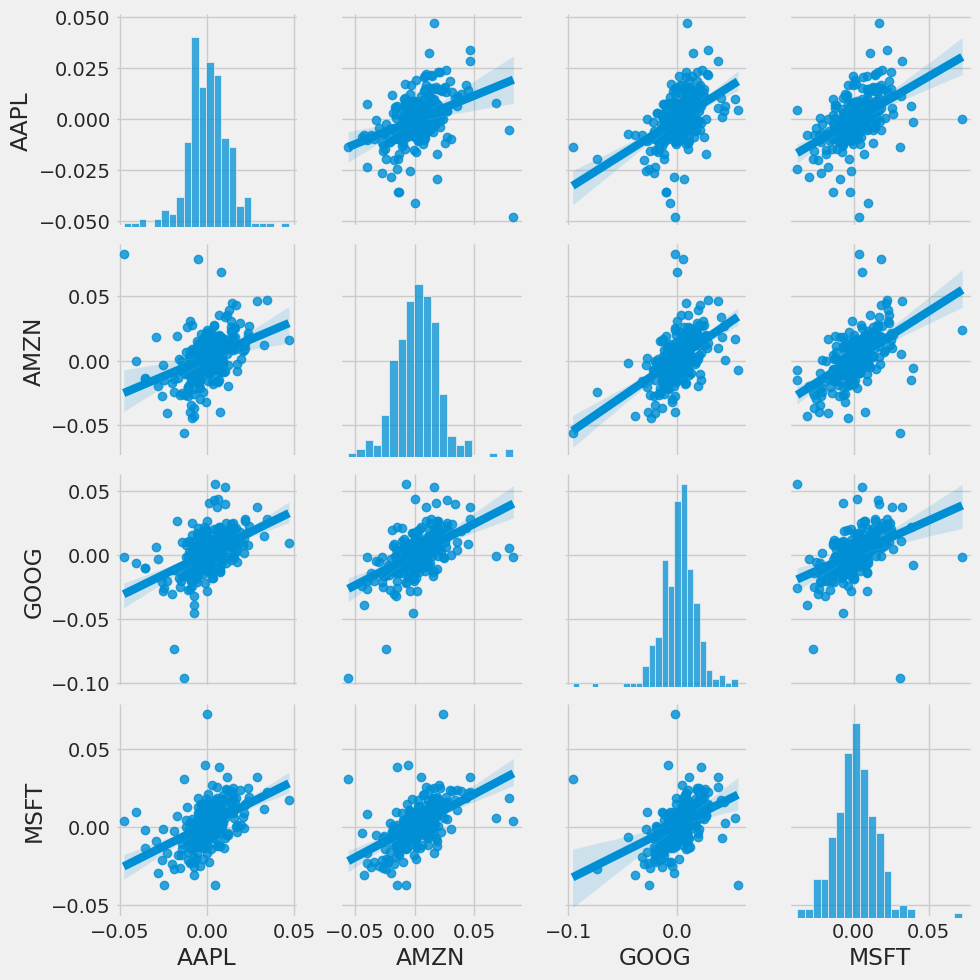

In [39]:
# Visualizing pairwise relationships with regression lines
sns.pairplot(tech_rets, kind='reg')

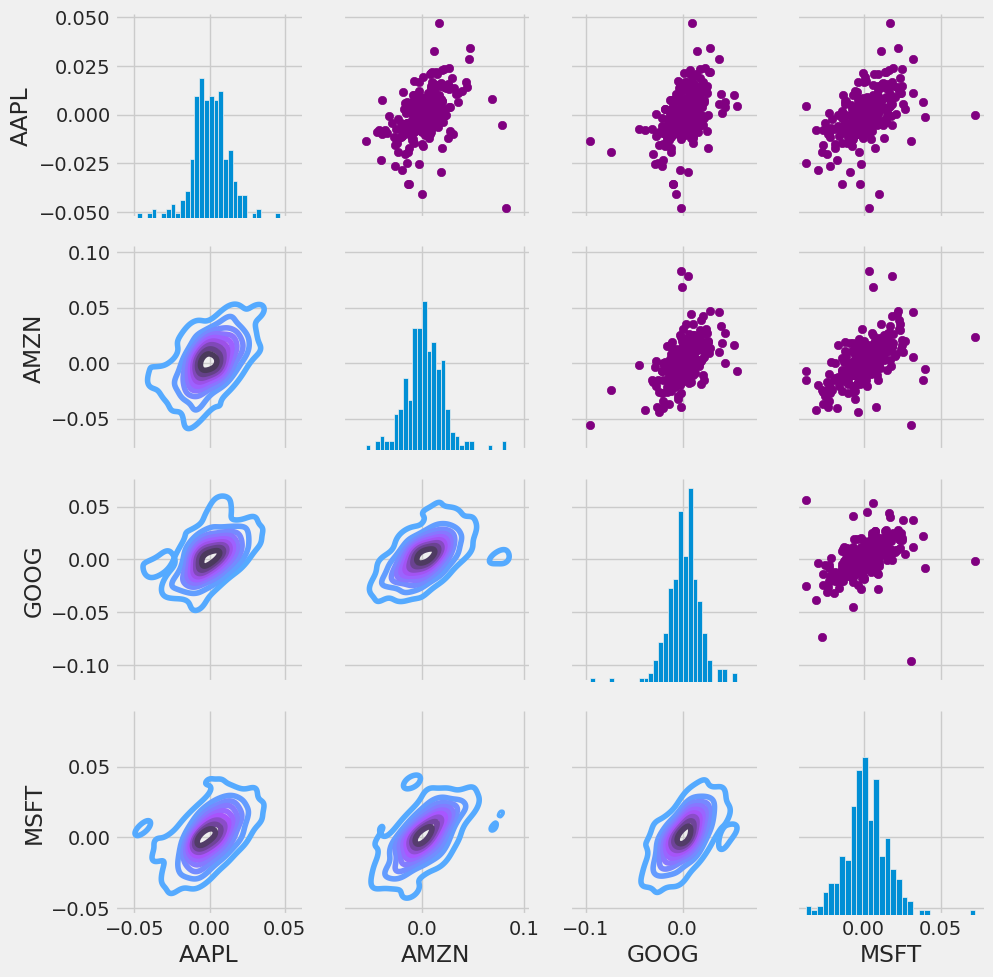

In [40]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

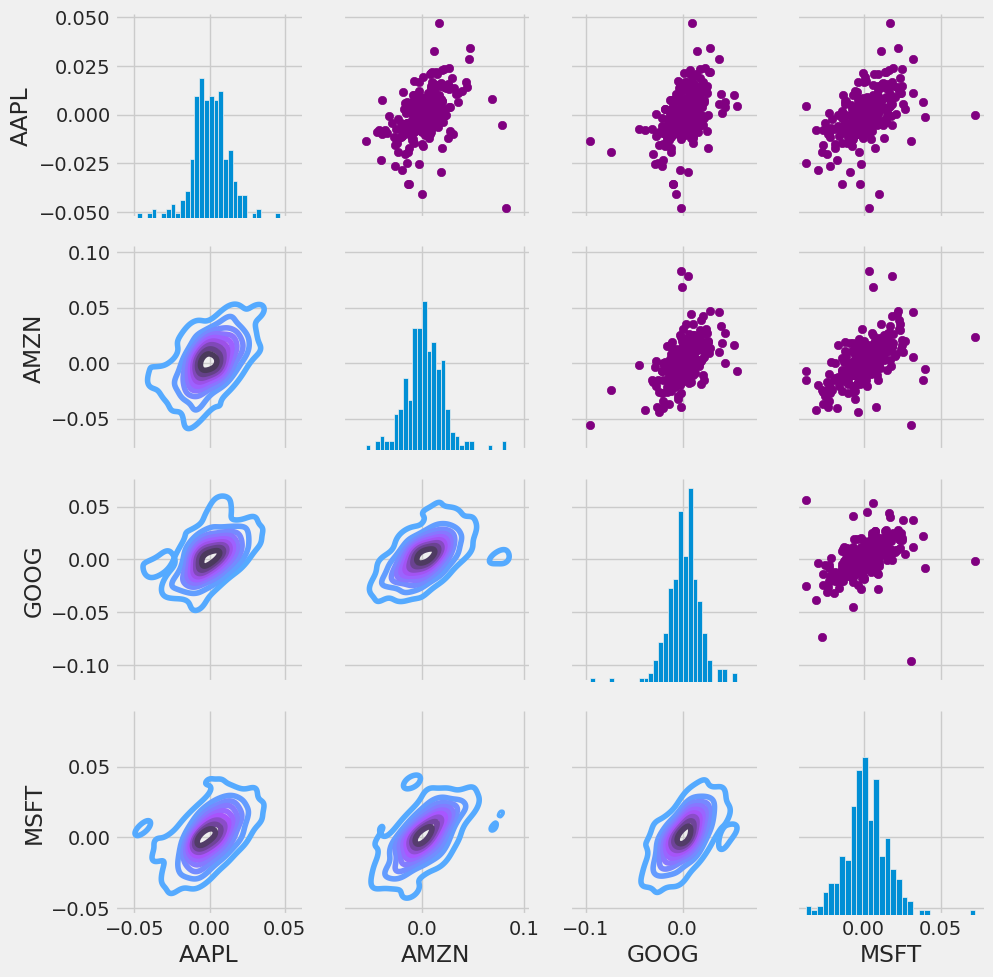

In [41]:
# Set up our figure by naming it returns_fig and call PairGrid on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Customize the upper triangle to scatter plots with a purple color
return_fig.map_upper(plt.scatter, color='purple')

# Customize the lower triangle to kernel density estimation plots with a 'cool_d' colormap
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Define the diagonal as a series of histogram plots of the daily return with 30 bins
return_fig.map_diag(plt.hist, bins=30)


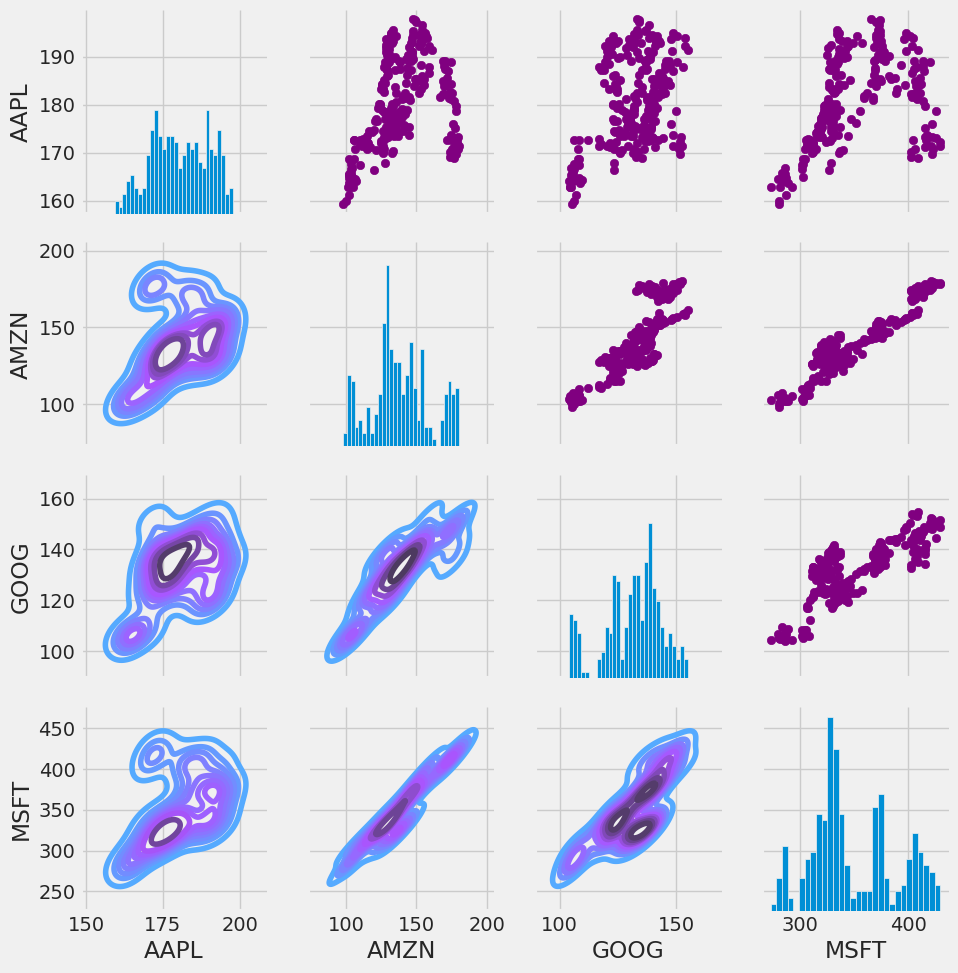

In [42]:
# Set up our figure by naming it returns_fig and call PairGrid on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Customize the upper triangle to scatter plots with a purple color
returns_fig.map_upper(plt.scatter, color='purple')

# Customize the lower triangle to kernel density estimation plots with a 'cool_d' colormap
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Define the diagonal as a series of histogram plots of the daily return with 30 bins
returns_fig.map_diag(plt.hist, bins=30)


Text(0.5, 1.0, 'Correlation of Tech Stock Closing Prices')

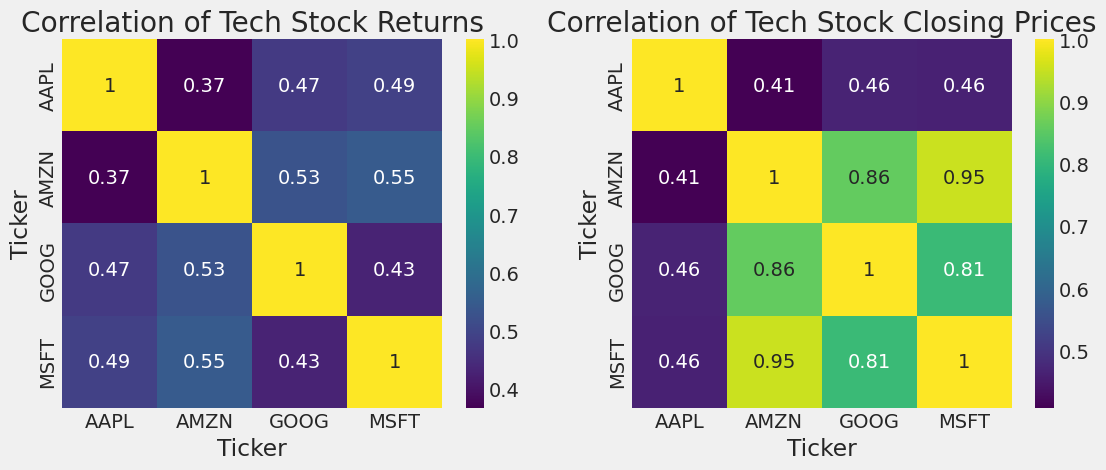

In [54]:
plt.figure(figsize=(12, 10))

# Plotting correlation heatmap for tech returns
plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='viridis')
plt.title('Correlation of Tech Stock Returns')

# Plotting correlation heatmap for stock closing prices
plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='viridis')
plt.title('Correlation of Tech Stock Closing Prices')


Text(0.5, 1.0, 'Risk vs. Expected Return for Tech Stocks')

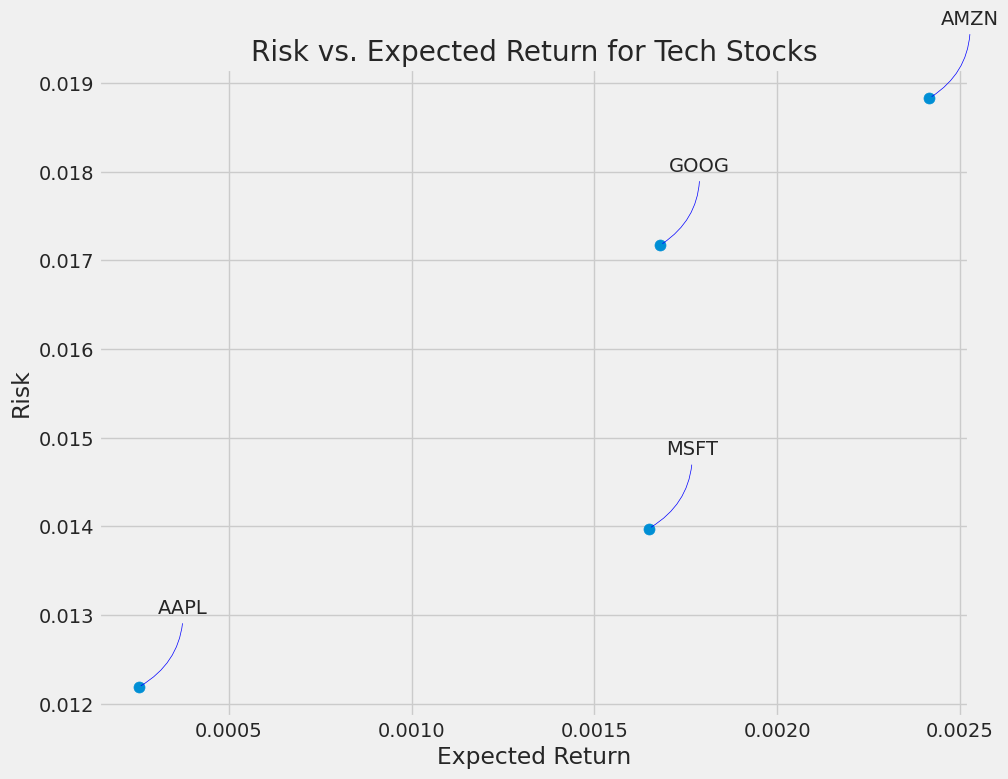

In [57]:
rets = tech_rets.dropna()

# Define the area of each point
area = np.pi * 20

# Create a scatter plot of mean returns vs. standard deviation of returns
plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)

# Set labels for x and y axes
plt.xlabel('Expected Return')
plt.ylabel('Risk')

# Annotate each point with the corresponding stock name
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points',
                 ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# Add a title to the plot
plt.title('Risk vs. Expected Return for Tech Stocks')



In [58]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
# Show the data
df


[*********************100%%**********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03   14.621429   14.732143   14.607143   14.686786   12.433824   
2012-01-04   14.642857   14.810000   14.617143   14.765714   12.500644   
2012-01-05   14.819643   14.948214   14.738214   14.929643   12.639430   
2012-01-06   14.991786   15.098214   14.972143   15.085714   12.771561   
2012-01-09   15.196429   15.276786   15.048214   15.061786   12.751302   
...                ...         ...         ...         ...         ...   
2024-03-22  171.759995  173.050003  170.059998  172.279999  172.279999   
2024-03-25  170.570007  171.940002  169.449997  170.850006  170.850006   
2024-03-26  170.000000  171.419998  169.580002  169.710007  169.710007   
2024-03-27  170.410004  173.600006  170.110001  173.309998  173.309998   
2024-03-28  171.750000  172.229996  170.509995  171.479996  171.479996   

               Volume  
Date                   
2012-01-03  302220800  
2012-01-04  260022000  
2012-01-05  271269600  
2012-01-06  318292800  
2012-01-09  394024400  
...               ...  
2024-03-22   71106600  
2024-03-25   54288300  
2024-03-26   57388400  
2024-03-27   60273300  
2024-03-28   65672700  

[3079 rows x 6 columns]

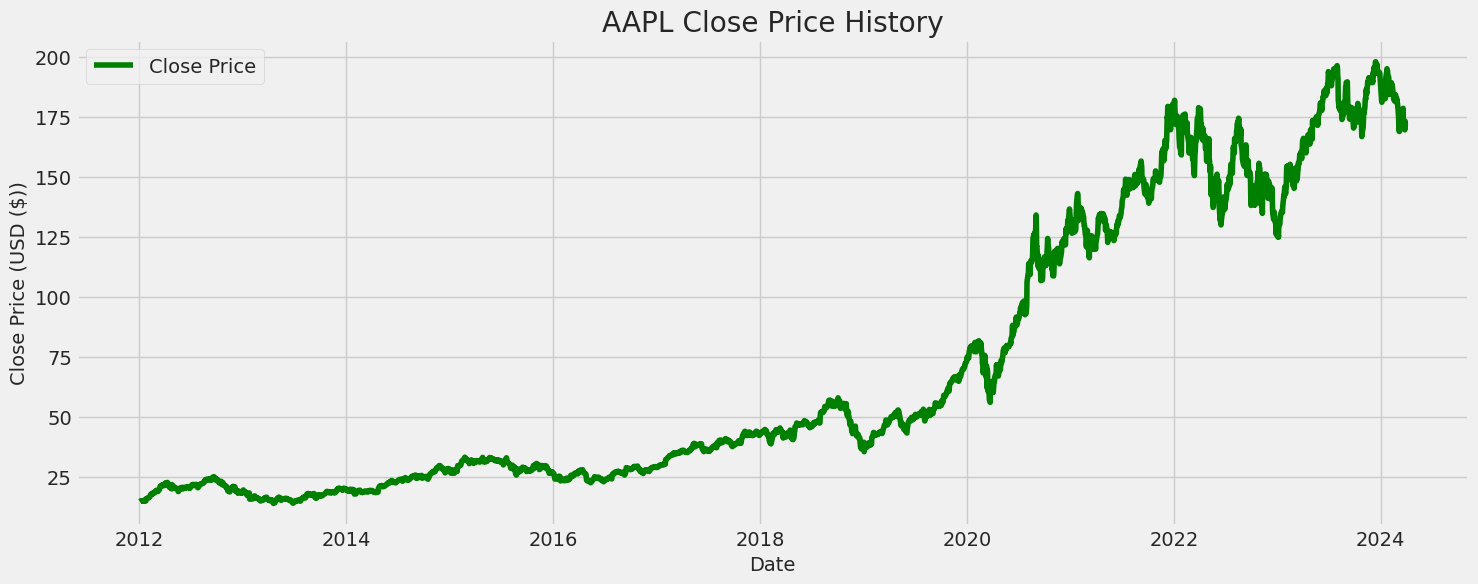

In [62]:
# Set the size of the figure
plt.figure(figsize=(16,6))

# Set the title of the plot
plt.title('AAPL Close Price History')

# Plotting the historical close prices
plt.plot(df['Close'], color='green', label='Close Price')

# Set the label for the x-axis with a specific font size
plt.xlabel('Date', fontsize=14)

# Set the label for the y-axis with a specific font size
plt.ylabel('Close Price (USD ($))', fontsize=14)

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()


In [65]:
# Create a new DataFrame with only the 'Close' column
data = df.filter(['Close'])

# Convert the DataFrame to a numpy array
dataset = data.values

# Get the number of rows to train the model on
# In this case, 95% of the total data will be used for training
training_data_len = int(np.ceil(len(dataset) * 0.95))

# Print the number of rows to train the model on
training_data_len


2926

In [66]:
# Scale the data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler with the specified feature range
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the dataset and transform the data
scaled_data = scaler.fit_transform(dataset)

# Print the scaled data
scaled_data


array([[0.00401431],
       [0.00444289],
       [0.00533302],
       ...,
       [0.8457884 ],
       [0.8653363 ],
       [0.85539942]])

In [ ]:
# Create the training dataset

# Create the scaled training dataset
train_data = scaled_data[0:int(training_data_len), :]

# Initialize lists to store the features (x_train) and target variable (y_train)
x_train = []
y_train = []

# Loop through the training data and create sequences of length 60 for x_train
# and corresponding target values for y_train
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:  # Print the sequences and target values for the first two iterations
        print(x_train)
        print(y_train)
        print()

# Convert the lists to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data to be 3-dimensional as required by LSTM model (batch_size, timesteps, input_dim)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Print the shape of the training data
print("Shape of x_train:", x_train.shape)


In [68]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1, verbose=1)  # Set verbose=1 to display progress during training

2866/2866 [==============================] - 190s 64ms/step - loss: 0.0012


In [69]:
# Create the testing dataset

# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60:, :]

# Initialize lists to store the features (x_test)
x_test = []

# Initialize a variable to store the actual prices (y_test)
y_test = dataset[training_data_len:, :]

# Loop through the test data and create sequences of length 60 for x_test
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data to be 3-dimensional as required by LSTM model (batch_size, timesteps, input_dim)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the model's predicted price values
predictions = model.predict(x_test)

# Inverse transform the predictions to get original scale
predictions = scaler.inverse_transform(predictions)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - y_test) ** 2))

# Print the root mean squared error (RMSE)
print("Root Mean Squared Error (RMSE):", rmse)


5/5 [==============================] - 3s 83ms/step
Root Mean Squared Error (RMSE): 4.32402142732656


<ipython-input-70-479c6ca02608>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


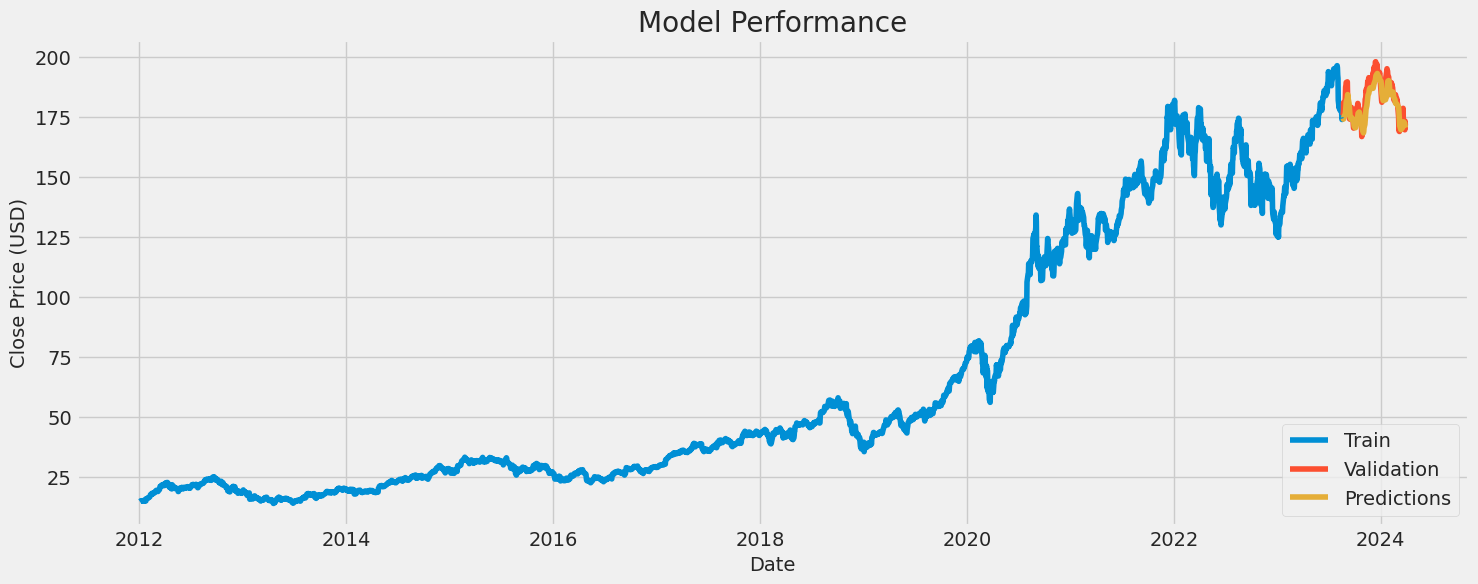

In [70]:
# Plotting the data

# Separate the training and validation data
train = data[:training_data_len]
valid = data[training_data_len:]

# Add the model predictions to the validation data
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16, 6))
plt.title('Model Performance')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price (USD)', fontsize=14)

# Plot the training data
plt.plot(train['Close'], label='Train')

# Plot the validation data and model predictions
plt.plot(valid['Close'], label='Validation')
plt.plot(valid['Predictions'], label='Predictions')

# Add legend
plt.legend(loc='lower right')

# Show the plot
plt.show()
